In [1]:
import pandas as pd

###### Load the CSV file #######
df = pd.read_csv(r"C:\Users\user\Downloads\btcusd_1-min_data.csv")
#### Show the first row
print(df.head(10))

      Timestamp  Open  High   Low  Close  Volume
0  1.325412e+09  4.58  4.58  4.58   4.58     0.0
1  1.325412e+09  4.58  4.58  4.58   4.58     0.0
2  1.325412e+09  4.58  4.58  4.58   4.58     0.0
3  1.325412e+09  4.58  4.58  4.58   4.58     0.0
4  1.325412e+09  4.58  4.58  4.58   4.58     0.0
5  1.325412e+09  4.58  4.58  4.58   4.58     0.0
6  1.325412e+09  4.58  4.58  4.58   4.58     0.0
7  1.325412e+09  4.58  4.58  4.58   4.58     0.0
8  1.325413e+09  4.58  4.58  4.58   4.58     0.0
9  1.325413e+09  4.58  4.58  4.58   4.58     0.0


In [3]:
import pandas as pd

###### Load the CSV file #######
df = pd.read_csv(r"C:\Users\user\Downloads\btcusd_1-min_data.csv")
#### Show the first row
print(df.head(10))

      Timestamp  Open  High   Low  Close  Volume
0  1.325412e+09  4.58  4.58  4.58   4.58     0.0
1  1.325412e+09  4.58  4.58  4.58   4.58     0.0
2  1.325412e+09  4.58  4.58  4.58   4.58     0.0
3  1.325412e+09  4.58  4.58  4.58   4.58     0.0
4  1.325412e+09  4.58  4.58  4.58   4.58     0.0
5  1.325412e+09  4.58  4.58  4.58   4.58     0.0
6  1.325412e+09  4.58  4.58  4.58   4.58     0.0
7  1.325412e+09  4.58  4.58  4.58   4.58     0.0
8  1.325413e+09  4.58  4.58  4.58   4.58     0.0
9  1.325413e+09  4.58  4.58  4.58   4.58     0.0


In [5]:
df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [7]:
df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [9]:
print(df.columns.tolist())

['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume']


In [11]:
# Convert Unix timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# Set timestamp as index (optional but useful)
df = df.set_index('Timestamp')

# Preview the first few rows
print(df.head())

                     Open  High   Low  Close  Volume
Timestamp                                           
2012-01-01 10:01:00  4.58  4.58  4.58   4.58     0.0
2012-01-01 10:02:00  4.58  4.58  4.58   4.58     0.0
2012-01-01 10:03:00  4.58  4.58  4.58   4.58     0.0
2012-01-01 10:04:00  4.58  4.58  4.58   4.58     0.0
2012-01-01 10:05:00  4.58  4.58  4.58   4.58     0.0


In [13]:
# Lag features (previous values of 'Close')
df['Close_Lag1'] = df['Close'].shift(1)
df['Close_Lag2'] = df['Close'].shift(2)

# Moving Averages
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_14'] = df['Close'].rolling(window=14).mean()

# Rolling Standard Deviation (volatility)
df['STD_7'] = df['Close'].rolling(window=7).std()

# Drop rows with NaN (due to shifting and rolling)
df = df.dropna()

In [14]:
# Define features and target variable
features = ['Open', 'High', 'Low', 'Volume', 'Close_Lag1', 'Close_Lag2', 'MA_7', 'MA_14', 'STD_7']
target = 'Close'

X = df[features]
y = df[target]

In [17]:
from sklearn.model_selection import train_test_split

# Split the dataset (no shuffle to preserve time order)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [19]:
# Keep only the last 100,000 rows
df_small = df.tail(100000)

X = df_small[features]
y = df_small[target]

# Train-test split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [23]:
print(df.head())
print(df.columns.tolist())

                     Open  High   Low  Close  Volume  Close_Lag1  Close_Lag2  \
Timestamp                                                                      
2012-01-01 10:14:00  4.58  4.58  4.58   4.58     0.0        4.58        4.58   
2012-01-01 10:15:00  4.58  4.58  4.58   4.58     0.0        4.58        4.58   
2012-01-01 10:16:00  4.58  4.58  4.58   4.58     0.0        4.58        4.58   
2012-01-01 10:17:00  4.58  4.58  4.58   4.58     0.0        4.58        4.58   
2012-01-01 10:18:00  4.58  4.58  4.58   4.58     0.0        4.58        4.58   

                     MA_7  MA_14  STD_7  
Timestamp                                
2012-01-01 10:14:00  4.58   4.58    0.0  
2012-01-01 10:15:00  4.58   4.58    0.0  
2012-01-01 10:16:00  4.58   4.58    0.0  
2012-01-01 10:17:00  4.58   4.58    0.0  
2012-01-01 10:18:00  4.58   4.58    0.0  
['Open', 'High', 'Low', 'Close', 'Volume', 'Close_Lag1', 'Close_Lag2', 'MA_7', 'MA_14', 'STD_7']


In [27]:
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

X = df[features]
y = df[target]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [33]:
df = df.tail(50_000)

In [35]:
df = df.tail(20_000)

In [37]:
features = ['Open', 'High', 'Low', 'Volume']  # drop lags, MA etc
target = 'Close'

X = df[features]
y = df[target]

In [39]:
model = RandomForestRegressor(n_estimators=10, random_state=42)

In [41]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load your data (already loaded as df)
df = df.tail(20000)  # Keep only last 20k rows

# Optional: convert Timestamp to datetime if needed
# df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
# df = df.set_index('Timestamp')

# Select features
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

X = df[features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Use small model to avoid MemoryError
model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 46610.16508749952


In [43]:
from sklearn.metrics import mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))

MAE: 65.16307499999968
R² score: 0.9323240352835356


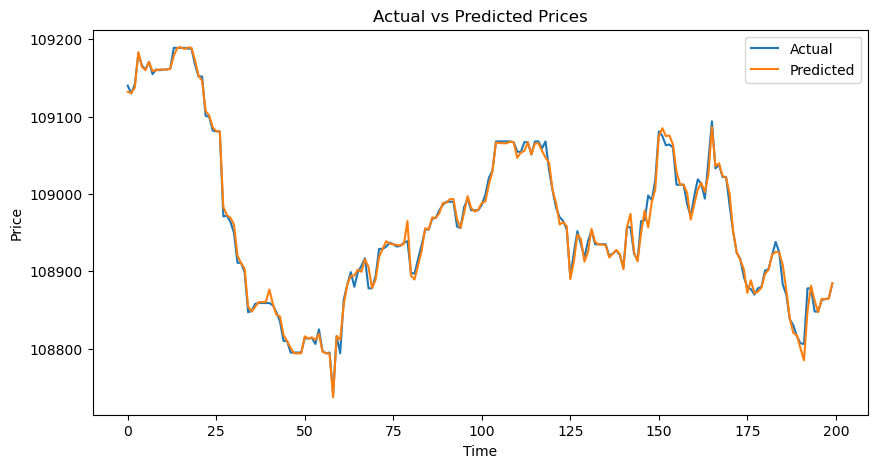

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:200], label='Actual')
plt.plot(y_pred[:200], label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [47]:
importances = model.feature_importances_
features = X_train.columns

for name, score in zip(features, importances):
    print(f"{name}: {score:.4f}")

Open: 0.0001
High: 0.2286
Low: 0.7713
Volume: 0.0000


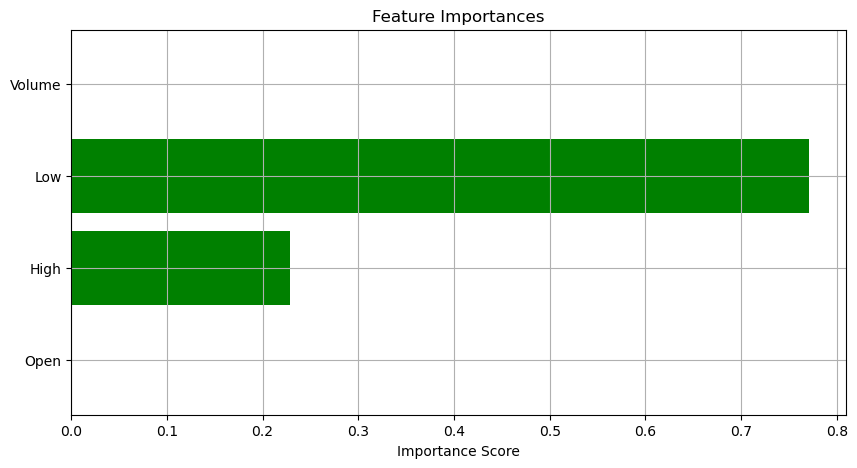

Open: 0.0001
High: 0.2286
Low: 0.7713
Volume: 0.0000


In [54]:
importances = model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10,5))
plt.barh(features, importances, color='green')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.grid(True)
plt.show()

# Optional printout
for name, score in zip(features, importances):
    print(f"{name}: {score:.4f}")